<a href="https://colab.research.google.com/github/zbennett349/Homework7/blob/main/Homework7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
#16.1
#testing the MNIST dataset

from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [33]:
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns

sns.set(font_scale = 2)

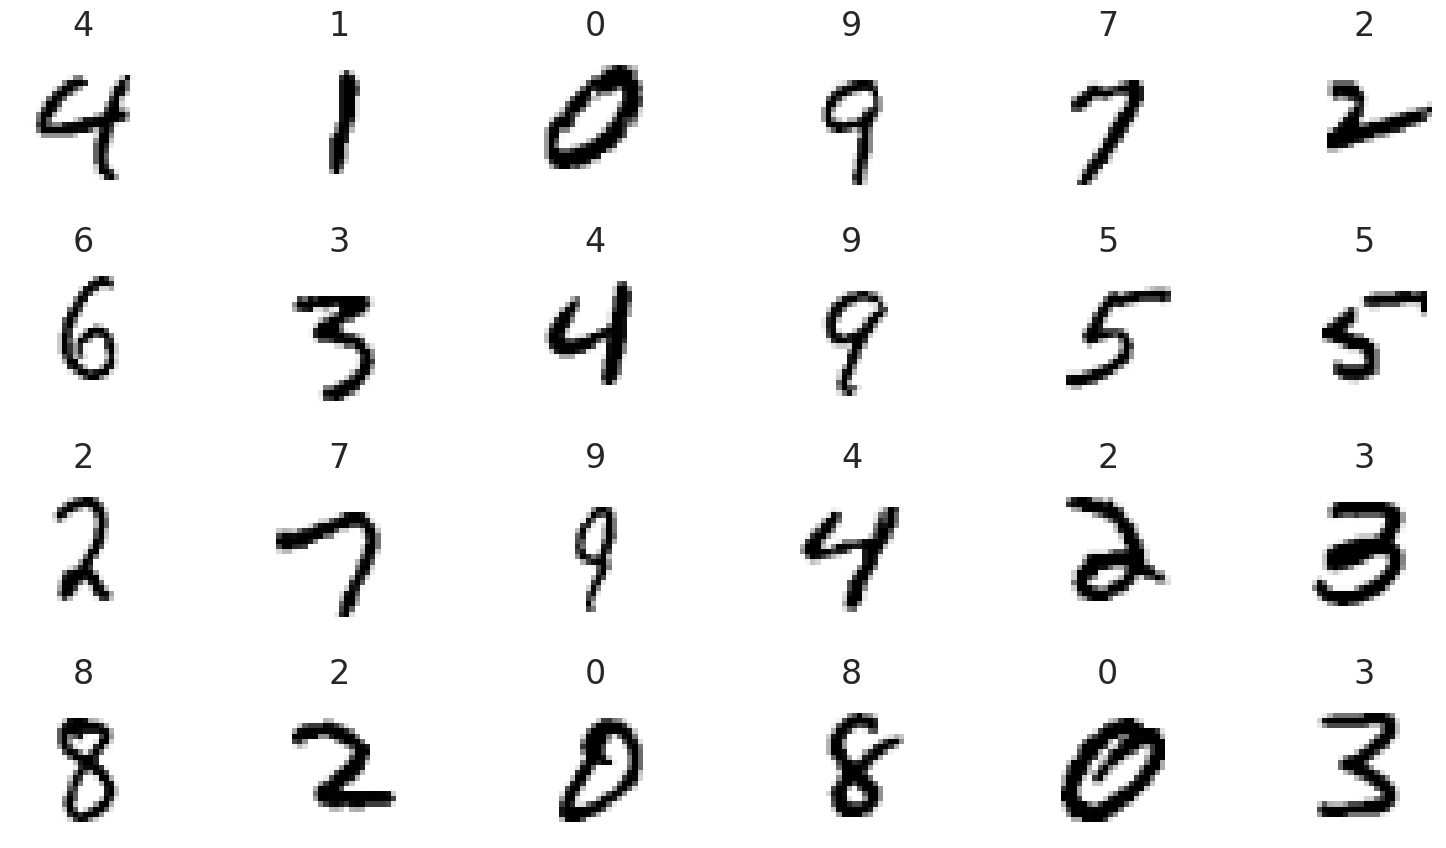

In [34]:
import numpy as np

index = np.random.choice(np.arange(len(X_train)), 24, replace = False)
figure, axes = plt.subplots(nrows = 4, ncols = 6, figsize = (16, 9))

for item in zip(axes.ravel(), X_train[index], y_train[index]):
    axes, image, target = item
    axes.imshow(image, cmap = plt.cm.gray_r)
    axes.set_xticks([])
    axes.set_yticks([])
    axes.set_title(target)
plt.tight_layout()

In [35]:
X_train = X_train.reshape(60000, 28, 28, 1)

X_test = X_test.reshape(10000, 28, 28, 1)

X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [36]:
X_train = X_train.astype('float32') / 255

X_test = X_test.astype('float32') / 255

In [37]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)

y_test = to_categorical(y_test)

y_train.shape, y_train[0], y_test.shape

((60000, 10), array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]), (10000, 10))

In [38]:
from tensorflow.keras.models import Sequential

cnn = Sequential()

In [39]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [40]:
cnn.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', input_shape = (28, 28, 1)))

cnn.add(MaxPooling2D(pool_size = (2, 2)))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
cnn.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu'))

cnn.add(MaxPooling2D(pool_size = (2, 2)))

In [42]:
cnn.add(Flatten())

In [43]:
cnn.add(Dense(units = 128, activation = 'relu'))

In [48]:
cnn.add(Dense(units = 10, activation = 'softmax'))

cnn.add(Flatten())

In [49]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         409,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 485,514 (1.85 MB)

 Trainable params: 485,514 (1.85 MB)

 Non-trainable params: 0 (0.00 B)

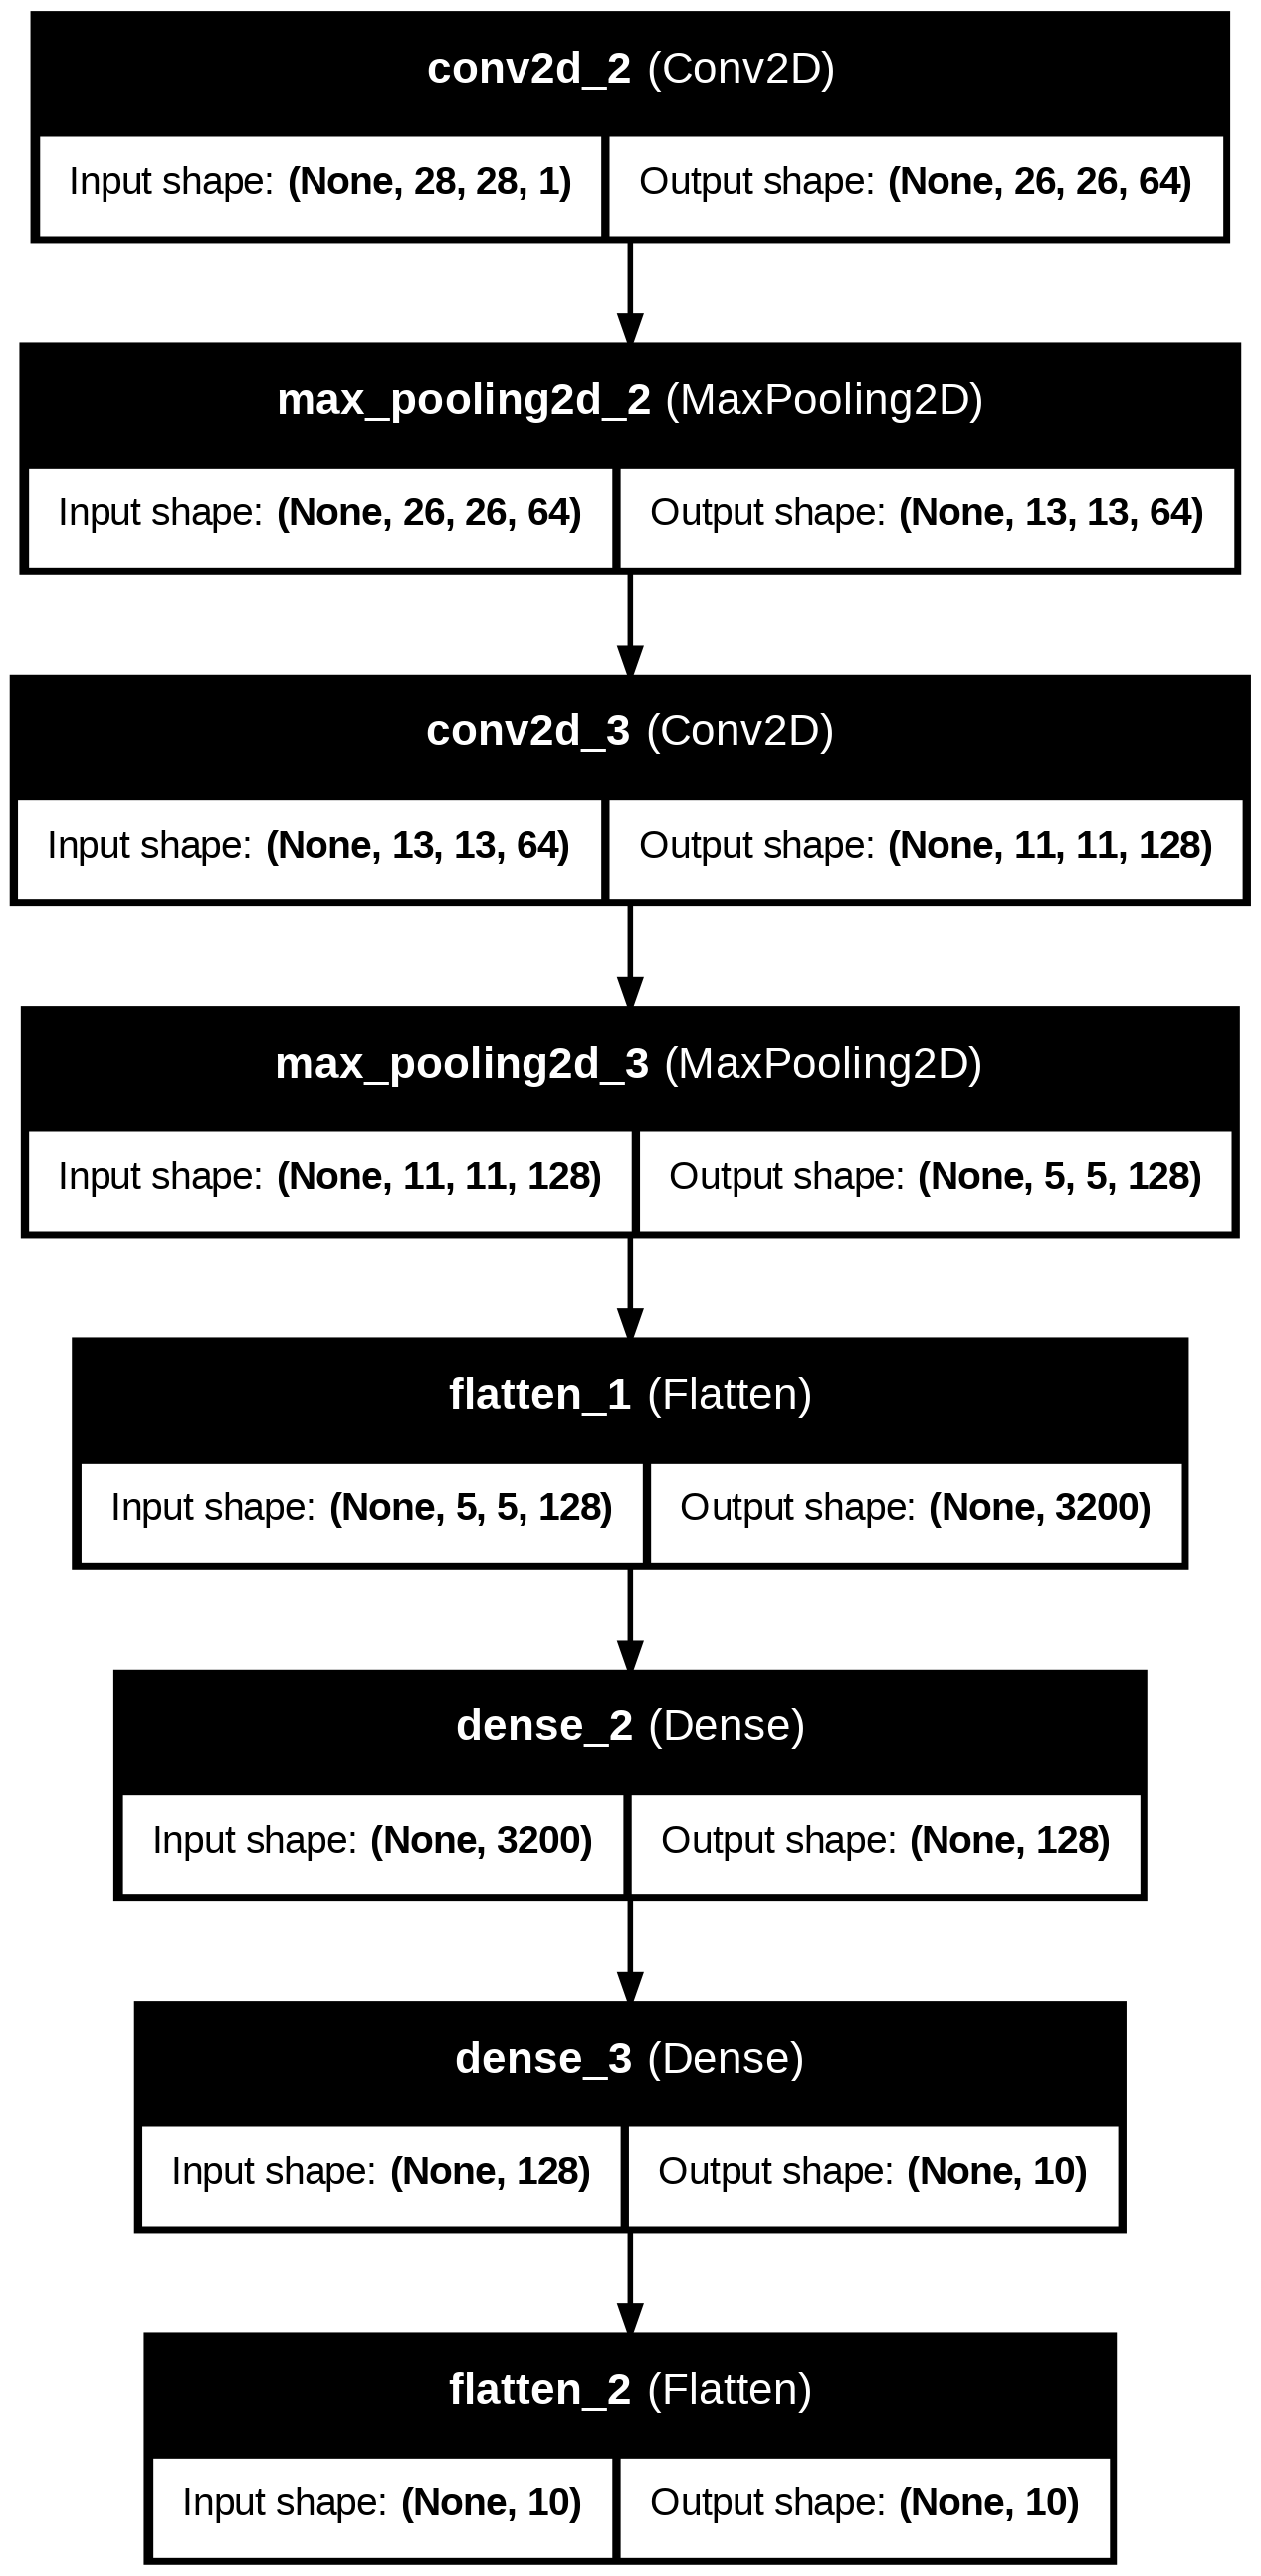

In [50]:
from tensorflow.keras.utils import plot_model

from IPython.display import Image

plot_model(cnn, to_file = 'convnet.png', show_shapes = True, show_layer_names = True)

Image(filename = 'convnet.png')

In [51]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [52]:
cnn.fit(X_train, y_train, batch_size = 64, epochs = 5, validation_split = 0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 104s 121ms/step - accuracy: 0.8942 - loss: 0.3385 - val_accuracy: 0.9835 - val_loss: 0.0559
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 103s 122ms/step - accuracy: 0.9836 - loss: 0.0493 - val_accuracy: 0.9863 - val_loss: 0.0411
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 140s 120ms/step - accuracy: 0.9914 - loss: 0.0267 - val_accuracy: 0.9882 - val_loss: 0.0393
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 102s 121ms/step - accuracy: 0.9940 - loss: 0.0196 - val_accuracy: 0.9913 - val_loss: 0.0356
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 141s 120ms/step - accuracy: 0.9950 - loss: 0.0151 - val_accuracy: 0.9907 - val_loss: 0.0355


In [53]:
loss, accuracy = cnn.evaluate(X_test, y_test)

loss, accuracy

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.9870 - loss: 0.0389


(0.03040841594338417, 0.9904999732971191)

In [54]:
#testing the fashion-MNIST dataset
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

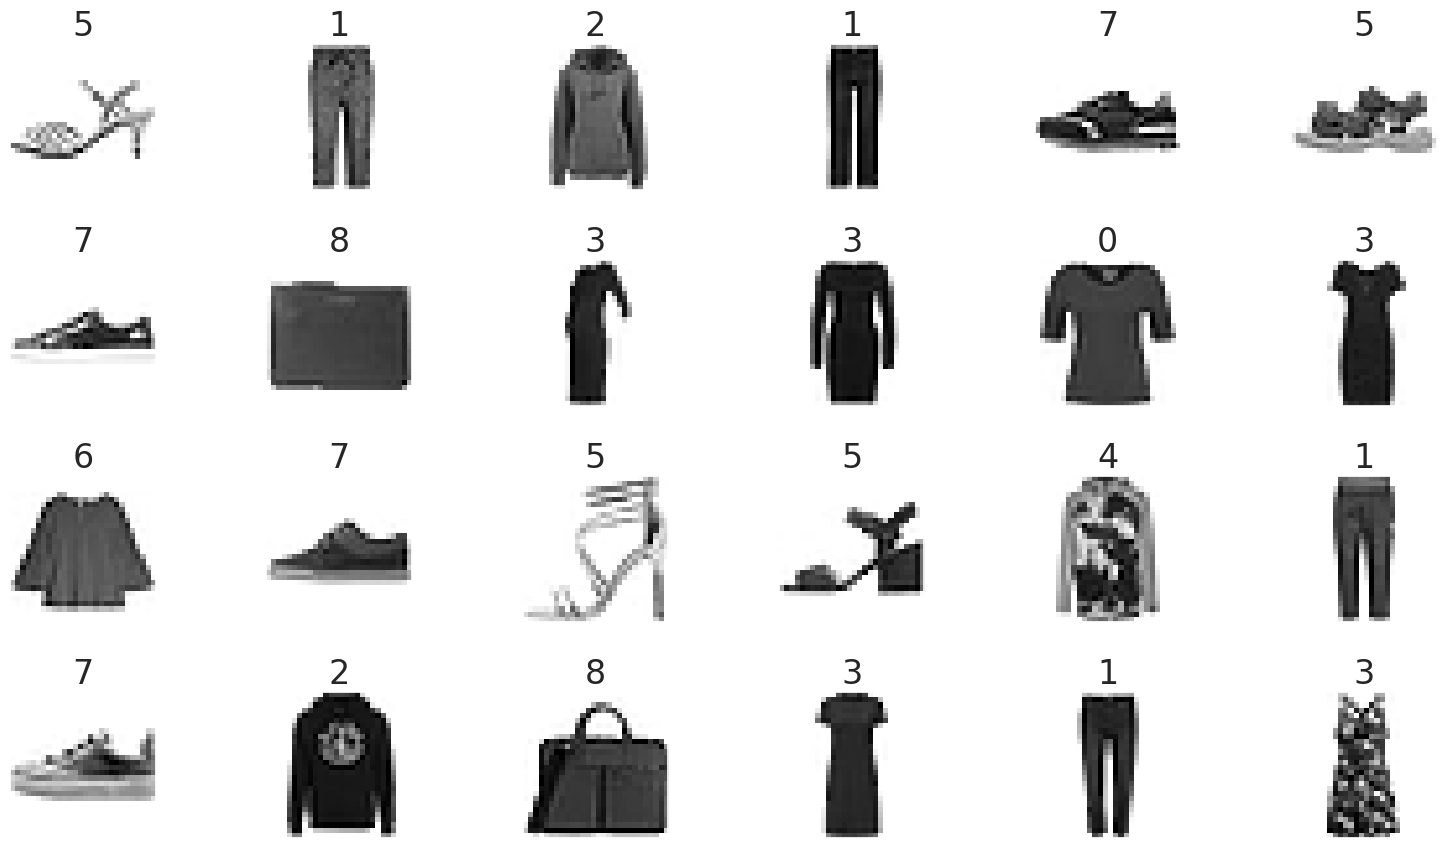

In [55]:
index = np.random.choice(np.arange(len(X_train)), 24, replace = False)
figure, axes = plt.subplots(nrows = 4, ncols = 6, figsize = (16, 9))

for item in zip(axes.ravel(), X_train[index], y_train[index]):
    axes, image, target = item
    axes.imshow(image, cmap = plt.cm.gray_r)
    axes.set_xticks([])
    axes.set_yticks([])
    axes.set_title(target)
plt.tight_layout()

In [56]:
X_train = X_train.reshape(60000, 28, 28, 1)

X_test = X_test.reshape(10000, 28, 28, 1)

X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [57]:
X_train = X_train.astype('float32') / 255

X_test = X_test.astype('float32') / 255

In [58]:
y_train = to_categorical(y_train)

y_test = to_categorical(y_test)

y_train.shape, y_train[0], y_test.shape

((60000, 10), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]), (10000, 10))

In [59]:
cnn = Sequential()

In [60]:
cnn.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', input_shape = (28, 28, 1)))

cnn.add(MaxPooling2D(pool_size = (2, 2)))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [61]:
cnn.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu'))

cnn.add(MaxPooling2D(pool_size = (2, 2)))

In [62]:
cnn.add(Flatten())

In [63]:
cnn.add(Dense(units = 128, activation = 'relu'))

In [64]:
cnn.add(Dense(units = 10, activation = 'softmax'))

cnn.add(Flatten())

In [65]:
cnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 11, 11, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         409,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 485,514 (1.85 MB)

 Trainable params: 485,514 (1.85 MB)

 Non-trainable params: 0 (0.00 B)

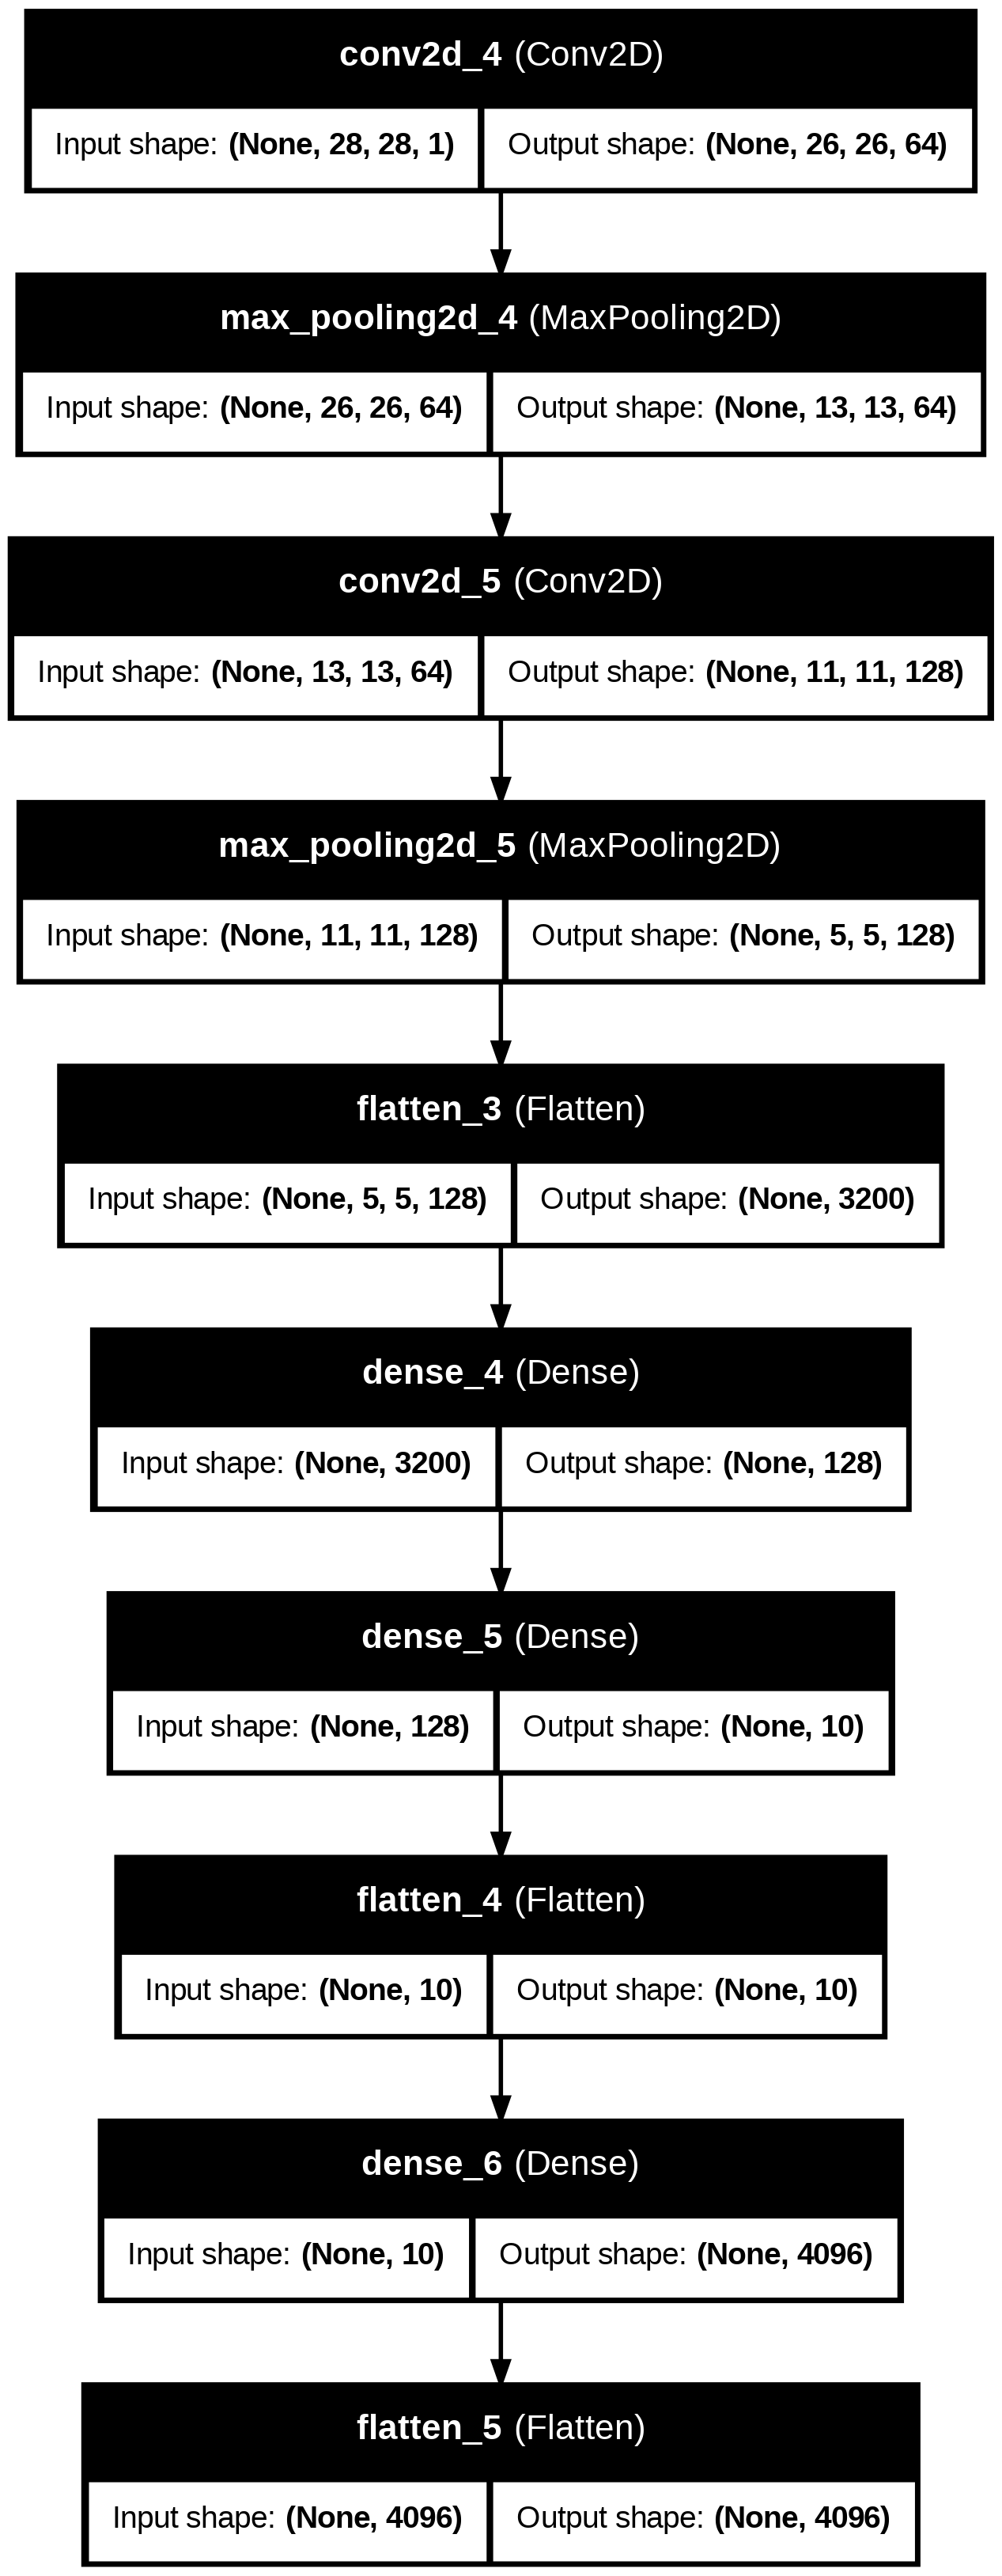

In [72]:
plot_model(cnn, to_file = 'convnet.png', show_shapes = True, show_layer_names = True)

Image(filename = 'convnet.png')

In [67]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [68]:
cnn.fit(X_train, y_train, batch_size = 64, epochs = 5, validation_split = 0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 113s 132ms/step - accuracy: 0.7615 - loss: 0.6505 - val_accuracy: 0.8708 - val_loss: 0.3550
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 108s 128ms/step - accuracy: 0.8834 - loss: 0.3194 - val_accuracy: 0.8962 - val_loss: 0.2913
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 143s 129ms/step - accuracy: 0.9023 - loss: 0.2641 - val_accuracy: 0.9055 - val_loss: 0.2670
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 140s 128ms/step - accuracy: 0.9146 - loss: 0.2271 - val_accuracy: 0.9092 - val_loss: 0.2428
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 142s 128ms/step - accuracy: 0.9253 - loss: 0.1962 - val_accuracy: 0.9082 - val_loss: 0.2430


In [69]:
loss, accuracy = cnn.evaluate(X_test, y_test)

loss, accuracy

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.9069 - loss: 0.2631


(0.25644904375076294, 0.9072999954223633)

In [80]:
#16.4

cnn.add(Dense(units = 4096, activation = 'relu'))

cnn.add(Flatten())

cnn.add(Dense(units=10, activation='softmax'))

In [81]:
cnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 11, 11, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         409,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 4096)                │          45,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │          40,970 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 4096)                │          45,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │          40,970 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,144,584 (198.92 MB)

 Trainable params: 17,438,878 (66.52 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 34,705,706 (132.39 MB)

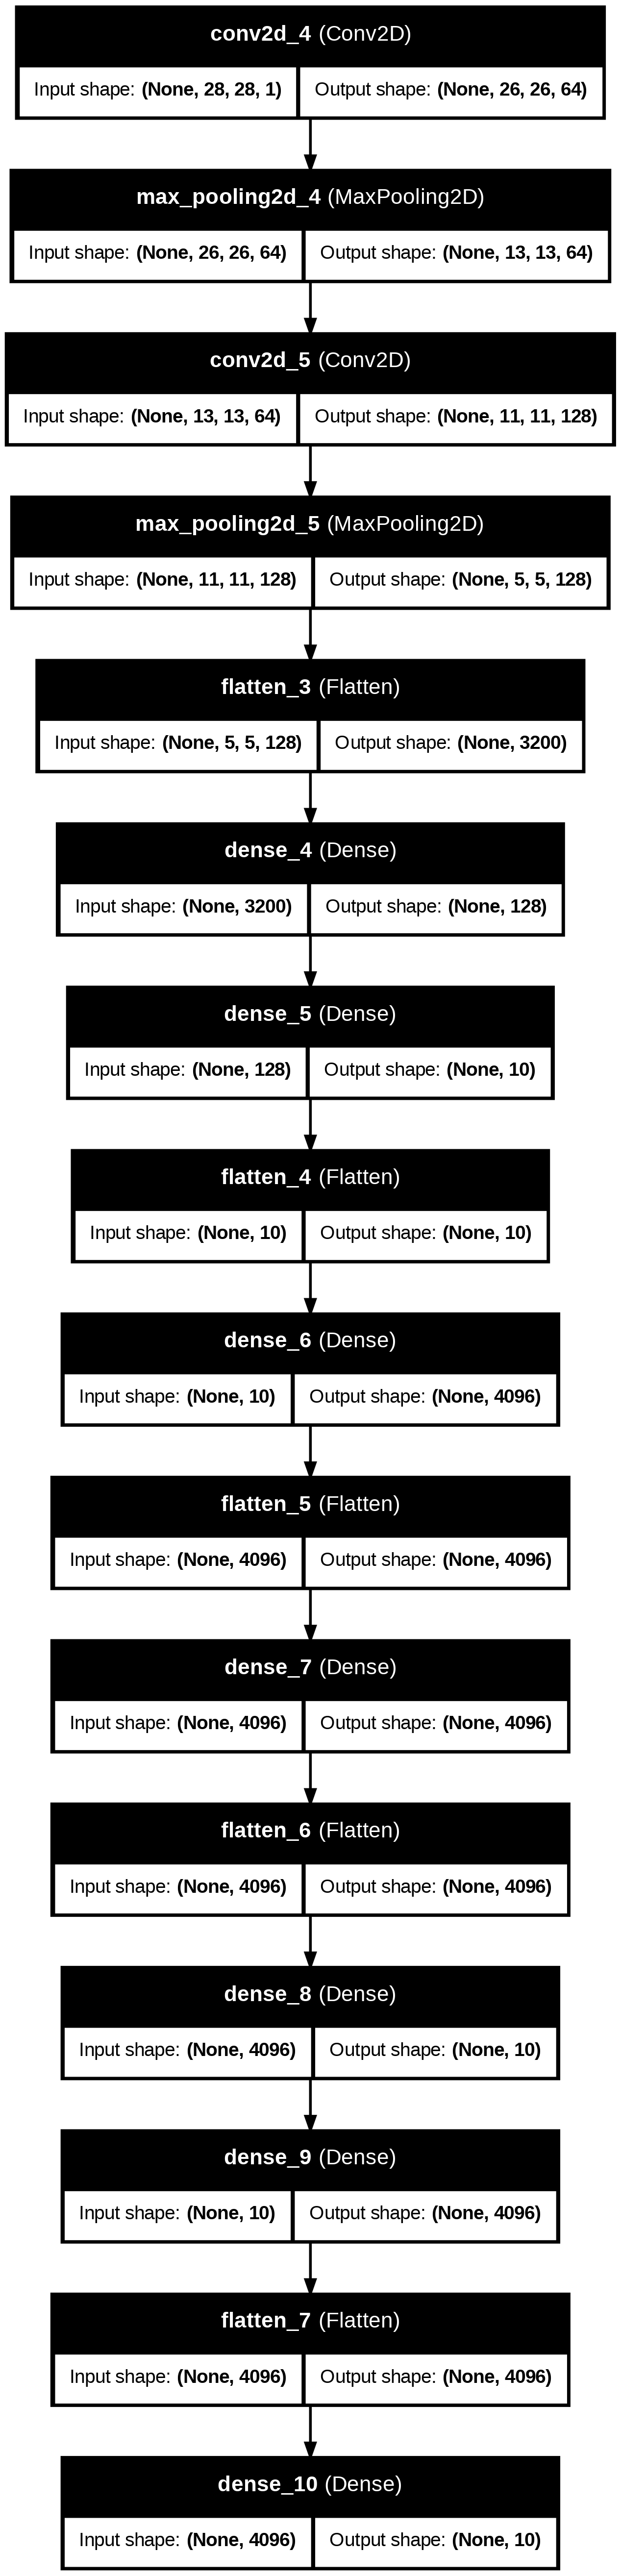

In [82]:
plot_model(cnn, to_file = 'convnet.png', show_shapes = True, show_layer_names = True)

Image(filename = 'convnet.png')

In [83]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [84]:
cnn.fit(X_train, y_train, batch_size = 64, epochs = 5, validation_split = 0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 451s 530ms/step - accuracy: 0.7476 - loss: 0.7667 - val_accuracy: 0.9052 - val_loss: 0.3154
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 501s 530ms/step - accuracy: 0.9305 - loss: 0.2110 - val_accuracy: 0.9070 - val_loss: 0.2893
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 499s 527ms/step - accuracy: 0.9392 - loss: 0.1860 - val_accuracy: 0.9075 - val_loss: 0.2914
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 445s 527ms/step - accuracy: 0.9443 - loss: 0.1692 - val_accuracy: 0.9073 - val_loss: 0.2947
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 500s 525ms/step - accuracy: 0.9488 - loss: 0.1516 - val_accuracy: 0.9060 - val_loss: 0.3329


In [85]:
loss, accuracy = cnn.evaluate(X_test, y_test)

loss, accuracy

313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 57ms/step - accuracy: 0.9028 - loss: 0.3358


(0.3308296501636505, 0.904699981212616)